# 案例一（节点）

{'graph_output': '拿铁咖啡馆的咖啡很香醇，欢迎下次光临'}


/var/folders/bm/2cq1vtmd5wg6k0vdjfpvbmww0000gn/T/ipykernel_26892/3988942254.py:96: LangGraphDeprecatedSinceV05: `input` is deprecated and will be removed. Please use `input_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  builder = StateGraph(
/var/folders/bm/2cq1vtmd5wg6k0vdjfpvbmww0000gn/T/ipykernel_26892/3988942254.py:96: LangGraphDeprecatedSinceV05: `output` is deprecated and will be removed. Please use `output_schema` instead. Deprecated in LangGraph V0.5 to be removed in V2.0.
  builder = StateGraph(


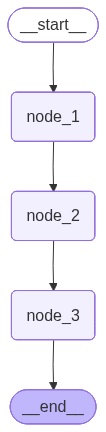

In [1]:
from typing import TypedDict

# 从 LangGraph 引入两个特殊常量：
# START：图的起点（graph 开始执行的地方）
# END：图的终点（graph 执行完毕后到达的地方）
from langgraph.constants import END, START

# StateGraph：LangGraph 的核心类，用来构建「状态机式」的多节点流程图
from langgraph.graph import StateGraph


# -----------------------------
# 1. 定义输入状态（InputState）
# -----------------------------
# TypedDict 让我们可以显式声明 state 字典内的字段和类型
# 这个状态表示「用户传入给 Graph 的输入」
class InputState(TypedDict):
    # 用户输入的文本，例如 prompt、问题、指令等
    user_input: str


# -----------------------------
# 2. 定义输出状态（OutputState）
# -----------------------------
# 这个状态表示「Graph 最终输出的内容」
class OutputState(TypedDict):
    # graph_output 是图执行后产生的最终输出
    graph_output: str


# -----------------------------
# 3. 定义整体状态（OverallState）
# -----------------------------
# 在 LangGraph 中，整体状态会随着节点执行不断更新。
# 体现 LangGraph 的「可累积、可合并、可追踪」特点。
class OverallState(TypedDict):
    # foo 是一个中间变量，用于演示数据逐步处理
    foo: str

    # 用户输入保留在 overall state 中
    user_input: str

    # 最终图运行输出
    graph_output: str


# -----------------------------
# 4. 定义私有状态（PrivateState）
# -----------------------------
# PrivateState 用来存储「仅某些节点使用」但不会暴露给最终输出的变量。
class PrivateState(TypedDict):
    # bar 是一个示例字段，用于说明私有数据
    bar: str


# ------------------------------------------------
# 5. 定义一个节点（node_1）
# ------------------------------------------------
def node_1(state: InputState) -> OverallState:
    """
    节点 1：
    将用户输入的咖啡名称加工成「某某咖啡馆」
    例如：输入 "拿铁" → foo = "拿铁咖啡馆"
    """
    return {
        "foo": state["user_input"] + "咖啡馆"
    }


def node_2(state: OverallState) -> PrivateState:
    """
    节点 2：
    从 OverallState 中读取 foo，然后加工成「咖啡很香醇」的句子
    例如：foo = "拿铁咖啡馆" → bar = "拿铁咖啡馆的咖啡很香醇"
    """
    return {
        "bar": state["foo"] + "的咖啡很香醇"
    }


def node_3(state: PrivateState) -> OutputState:
    """
    节点 3：
    最终输出，将 bar 再加上 "欢迎下次光临" 完成整个流程
    例如：bar = "拿铁咖啡馆的咖啡很香醇"
    输出 graph_output = "拿铁咖啡馆的咖啡很香醇，欢迎下次光临"
    """
    return {
        "graph_output": state["bar"] + "，欢迎下次光临"
    }


# =====================================
# 构建 LangGraph
# =====================================
builder = StateGraph(
    OverallState,        # 整体状态类型（所有节点共享的 state）
    input=InputState,    # Graph 的输入类型（用户传入）
    output=OutputState   # Graph 的最终输出类型
)

# -------------------------------------
# 添加节点（添加执行步骤）
# -------------------------------------
builder.add_node("node_1", node_1)   # 第一个节点：处理 user_input → foo
builder.add_node("node_2", node_2)   # 第二个节点：处理 foo → bar
builder.add_node("node_3", node_3)   # 第三个节点：处理 bar → graph_output

# -------------------------------------
# 添加边（决定节点执行顺序）
# -------------------------------------
builder.add_edge(START, "node_1")    # 起点 START → node_1
builder.add_edge("node_1", "node_2") # node_1 → node_2
builder.add_edge("node_2", "node_3") # node_2 → node_3
builder.add_edge("node_3", END)      # node_3 → 终点 END

# -------------------------------------
# 编译 Graph，得到可调用的静态图
# -------------------------------------
graph = builder.compile()

# -------------------------------------
# 调用 Graph，传入 InputState
# -------------------------------------
result = graph.invoke({"user_input": "拿铁"})
print(result)
# 输出示例：
# {"graph_output": "拿铁咖啡馆的咖啡很香醇，欢迎下次光临"}

# 可视化图结构
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

# 案例二 （节点）

{'messages': [HumanMessage(content='开始学习', additional_kwargs={}, response_metadata={}, id='9b55e4a2-a4d8-45e3-a046-7a8fa76f0eb9'), AIMessage(content='你好', additional_kwargs={}, response_metadata={}, id='81dbe877-571e-49d2-a0f6-894ed7e4b639'), AIMessage(content='欢迎学习 LangGraph', additional_kwargs={}, response_metadata={}, id='9dc656c6-1bf2-427e-9276-082411b19c93')], 'list_field': ['x', 'y', 'z', 'm', 'n'], 'another_field': 20}

===== State 字段逐项打印 =====
messages:
  - content='开始学习' additional_kwargs={} response_metadata={} id='9b55e4a2-a4d8-45e3-a046-7a8fa76f0eb9'
  - content='你好' additional_kwargs={} response_metadata={} id='81dbe877-571e-49d2-a0f6-894ed7e4b639'
  - content='欢迎学习 LangGraph' additional_kwargs={} response_metadata={} id='9dc656c6-1bf2-427e-9276-082411b19c93'
list_field: ['x', 'y', 'z', 'm', 'n']
another_field: 20


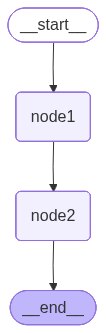

In [2]:
## 案例二

from langchain_core.messages import AnyMessage, AIMessage
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages   # 用于 Annotated，使 messages 字段支持"自动追加"
from typing import Annotated, TypedDict
from operator import add                           # 用于 Annotated，使 list_field 字段支持"自动累加"


# ============================================
# 1. 定义 State（整体状态结构）
# ============================================
class State(TypedDict):
    # messages 字段：存放消息列表
    messages: Annotated[list[AnyMessage], add_messages]

    # list_field：一个字符串列表（案例中使用的是 ['x','y','z']）
    list_field: Annotated[list[str], add]

    # 普通字段，不参与合并
    another_field: int


# ============================================
# 2. 定义节点 node1
# ============================================
def node1(state: State):
    """
    node1:
    - 创建新的 AIMessage("你好")
    - list_field 追加 ['m']
    - another_field = 10
    """
    new_message = AIMessage("你好")
    return {
        "messages": [new_message],
        "list_field": ['m'],
        "another_field": 10
    }


# ============================================
# 3. 定义节点 node2
# ============================================
def node2(state: State):
    """
    node2:
    - 创建新的 AIMessage("欢迎学习 LangGraph")
    - list_field 追加 ['n']
    - another_field = 20（此字段直接覆盖前面的）
    """
    new_message = AIMessage("欢迎学习 LangGraph")
    return {
        "messages": [new_message],
        "list_field": ['n'],
        "another_field": 20
    }


# ============================================
# 4. 构建状态图（StateGraph）
# ============================================
graph = (
    StateGraph(State)
        .add_node("node1", node1)
        .add_node("node2", node2)
        .set_entry_point("node1")
        .add_edge("node1", "node2")
        .compile()
)


# ============================================
# 5. 调用 Graph
# ============================================
input_message = {"role": "user", "content": "开始学习"}

result = graph.invoke({
    "messages": [input_message],
    "list_field": ['x', 'y', 'z']
})

# 保留你原来的打印
print(result)

# ================================
# 新增：打印 result 内各个字段的内容
# ================================
print("\n===== State 字段逐项打印 =====")
print("messages:")
for msg in result["messages"]:
    print("  -", msg)

print("list_field:", result["list_field"])
print("another_field:", result["another_field"])


# 可视化图结构
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

# 案例三（config）

/var/folders/bm/2cq1vtmd5wg6k0vdjfpvbmww0000gn/T/ipykernel_26892/2710747502.py:73: LangGraphDeprecatedSinceV10: `config_schema` is deprecated and will be removed. Please use `context_schema` instead. Deprecated in LangGraph V1.0 to be removed in V2.0.
  builder = StateGraph(State, config_schema=ConfigSchema)


{'score': 60, 'user_id': 'u_001'}
{'score': 60, 'user_id': 'u_001'}


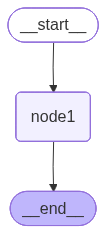

In [3]:
from typing import TypedDict
import time

from langchain_core.runnables import RunnableConfig
from langgraph.constants import START, END
from langgraph.graph import StateGraph
from langgraph.types import CachePolicy
from langgraph.cache.memory import InMemoryCache


# ============================================================
# 1. 定义 State（流程运行的"状态"）
# ------------------------------------------------------------
# 每次节点运行后，都会返回一个字典增量，然后合并到 State 中。
# 这里 State 记录两项：
#   score：用于累加分数
#   user_id：记录是哪位用户
# ============================================================
class State(TypedDict):
    score: int
    user_id: str


# ============================================================
# 2. 定义 ConfigSchema（传入 Graph 的可配置参数）
# ------------------------------------------------------------
# LangGraph 在执行 invoke() / stream() 时接受一个 config={}
# 用户所有放入 config["configurable"] 的字段，会自动传给每个节点。
#
# 例如：
# graph.invoke(..., config={"configurable": {"user_id": "u_001"}})
#
# 这样 config["configurable"]["user_id"] 就能在节点中读取。
# ============================================================
class ConfigSchema(TypedDict):
    user_id: str


# ============================================================
# 3. 定义节点函数 node1
# ------------------------------------------------------------
# 每次执行 node1：
#   - 让 score 加 10
#   - 从 config 中读出 user_id 并写回 State
#
# config 参数类型为 RunnableConfig（LangGraph 会包装成此类型）
# 节点内部通过 config["configurable"] 读取外部传进来的参数。
# ============================================================
def node_1(state: State, config: RunnableConfig):

    # 模拟节点执行耗时
    time.sleep(1)

    # 从 config["configurable"] 中读取 user_id
    user_id = config["configurable"]["user_id"]

    # 返回增量状态（LangGraph 会合并到原状态）
    return {
        "score": state["score"] + 10,
        "user_id": user_id
    }


# ============================================================
# 4. 创建 StateGraph，并绑定 State 与 ConfigSchema
# ------------------------------------------------------------
# StateGraph(State, config_schema=ConfigSchema)
#
# 表示：
#   - State 是流程运行的状态结构
#   - ConfigSchema 是 config["configurable"] 可以包含的键
# ============================================================
builder = StateGraph(State, config_schema=ConfigSchema)


# 注册节点 node1，并设置缓存策略（TTL=5秒）
builder.add_node("node1", node_1, cache_policy=CachePolicy(ttl=5))

# 添加 START → node1
builder.add_edge(START, "node1")

# 添加 node1 → END
builder.add_edge("node1", END)


# ============================================================
# 5. 编译图，并启用 InMemoryCache（节点缓存系统）
# ------------------------------------------------------------
# cache=InMemoryCache() 用于存储节点输出结果：
#   - 同样的输入 state
#   - 同样的 config["configurable"]
#   - 在 TTL 时间内（5 秒）
# 节点将直接命中缓存，不会重复调用 node_1()
# ============================================================
graph = builder.compile(cache=InMemoryCache())


# ============================================================
# 6. 执行图（第一次执行，不命中缓存）
# ------------------------------------------------------------
# 初始状态：
#   score = 50
# config 中传入 user_id="u_001"
#
# 流程：
# START → node1 → END
#
# node1 会运行一次（sleep 1 秒），输出：
#   score = 60
#   user_id = "u_001"
# ============================================================
print(graph.invoke({"score": 50}, config={"configurable": {"user_id": "u_001"}}))
# 输出示例：
# {'score': 60, 'user_id': 'u_001'}


# ============================================================
# 7. 在 5 秒 TTL 内再次执行（命中缓存）
# ------------------------------------------------------------
# 由于：
#   - 输入状态 {"score":50}
#   - config["configurable"] 完全相同
#   - TTL=5 秒以内
#
# 所以 node1 不会再次执行（不会 sleep 1 秒）
# 会直接返回缓存中的结果，并附带：
#   "__metadata__": {"cached": True}
# ============================================================
print(graph.invoke({"score": 50}, config={"configurable": {"user_id": "u_001"}}))
# 输出示例：
# node1: {'score': 60, 'user_id': 'u_001', '__metadata__': {'cached': True}}


# 可视化图结构
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

# 案例四（简单边）

{'count': 4}


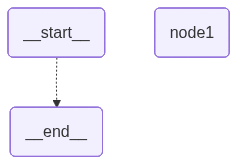

{'count': 13}


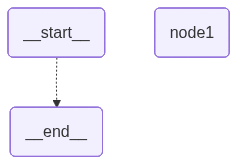

In [4]:
from langchain_core.runnables import RunnableConfig
from langgraph.constants import START, END
from langgraph.graph import StateGraph
from typing import TypedDict

# ======================================================
# 1. 定义 State（状态结构）
# ------------------------------------------------------
# StateGraph 的每一次执行，都会维护一个"状态字典"
# 这里我们只定义一个字段 count，用来递增计数。
# ======================================================
class State(TypedDict):
    count: int


# ======================================================
# 2. 定义节点函数（Node）
# ------------------------------------------------------
# node_1 是一个节点（相当于流程中的一个步骤）
# 每次运行 node_1，就会让 count + 5
# ------------------------------------------------------
def node_1(state: State, config: RunnableConfig):
    # 返回的新状态必须是部分字段更新（dict merge）
    return {"count": state["count"] + 5}


# ======================================================
# 3. 创建 StateGraph，并添加节点
# ------------------------------------------------------
# builder = StateGraph(State)
# 用来构建整张图
# ------------------------------------------------------
builder = StateGraph(State)

# 添加一个名叫 "node1" 的节点，对应函数 node_1
builder.add_node("node1", node_1)


# ======================================================
# 4. 定义 routing function（条件路由函数）
# ------------------------------------------------------
# 这个函数会根据当前状态，决定接下来走哪一个节点
# 如果 count > 6，就继续走 node1
# 否则流程结束（END）
# ------------------------------------------------------
def routing_func(state: State) -> str:
    if state["count"] > 6:
        return "node1"   # 继续循环执行 node1
    else:
        return END       # 结束流程


# ======================================================
# 5. 添加边（Edges）
# ------------------------------------------------------
# node1 → END
# （注意：这只是定义一个可能的边，是否真正走到这里由 routing_func 决定）
# ------------------------------------------------------
builder.add_edge("node1", END)

# START → (条件路由) → node1 或 END
# ------------------------------------------------------
builder.add_conditional_edges(
   START,          # 起点
   routing_func    # 用 routing_func 决定下一步去哪里
)

# ======================================================
# 6. 编译成可执行的 graph
# ======================================================
graph = builder.compile()

# ======================================================
# 7. 运行图
# ------------------------------------------------------
# 初始状态是 {"count": 4}
# routing_func -> 4 <= 6 → END
# 所以不会执行 node1
# ------------------------------------------------------
print(graph.invoke({"count":4}))

# 可视化图结构
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

# 初始状态是 {"count": 8}
# routing_func -> 8 > 6 → node1
# 所以会执行 node1
# ------------------------------------------------------
print(graph.invoke({"count":8}))
# 可视化图结构
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

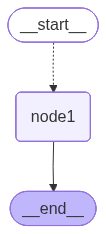

In [5]:
from typing import TypedDict
from langchain_core.runnables import RunnableConfig
from langgraph.constants import START, END
from langgraph.graph import StateGraph

# ------------------------------------------------------
# 1. 定义 State
# ------------------------------------------------------
class State(TypedDict):
    count: int


# ------------------------------------------------------
# 2. 定义节点 node1
# ------------------------------------------------------
def node1(state: State, config: RunnableConfig):
    return {"count": state["count"] + 5}


# ------------------------------------------------------
# 3. 创建 builder
# ------------------------------------------------------
builder = StateGraph(State)

builder.add_node("node1", node1)


# ------------------------------------------------------
# 4. 路由函数（条件边逻辑）
# ------------------------------------------------------
def routing_func(state: State) -> str:
    return "node1"      # 固定返回 node1，这样图中只画 START→node1 的虚线


# ------------------------------------------------------
# 5. 添加边
# ------------------------------------------------------
# 固定边：node1 → END
builder.add_edge("node1", END)

# 条件边（虚线）：START → node1
# 第三个参数 mapping 用于告诉可视化：routing_func 只可能返回 node1
builder.add_conditional_edges(
    START,
    routing_func,
    {
        "node1": "node1"
    }
)

# ------------------------------------------------------
# 6. 编译图
# ------------------------------------------------------
graph = builder.compile()


# ------------------------------------------------------
# 7. 可视化（虚线条件边）
# ------------------------------------------------------
from IPython.display import Image, display
display(Image(graph.get_graph(xray=False).draw_mermaid_png()))

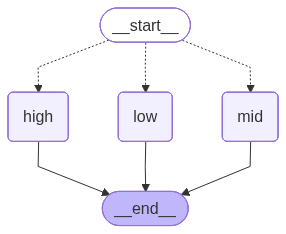

{'value': 11}

In [6]:
from typing import TypedDict
from langchain_core.runnables import RunnableConfig
from langgraph.constants import START, END
from langgraph.graph import StateGraph

# ===========================================
# 1. 定义 State
# ===========================================
class State(TypedDict):
    value: int


# ===========================================
# 2. 定义多个节点（node_low, node_mid, node_high）
# ===========================================
def node_low(state: State, config: RunnableConfig):
    return {"value": state["value"] + 5}

def node_mid(state: State, config: RunnableConfig):
    return {"value": state["value"] + 10}

def node_high(state: State, config: RunnableConfig):
    return {"value": state["value"] + 20}


# ===========================================
# 3. 创建 builder & 注册节点
# ===========================================
builder = StateGraph(State)
builder.add_node("low", node_low)
builder.add_node("mid", node_mid)
builder.add_node("high", node_high)


# ===========================================
# 4. 定义 routing_func：多条件返回不同 node
# ===========================================
def routing_func(state: State) -> str:
    v = state["value"]
    if v <= 8:
        return "low"
    elif v <= 15:
        return "mid"
    else:
        return "high"


# ===========================================
# 5. 添加边
# ===========================================

# 每个节点都指向 END（实线）
builder.add_edge("low", END)
builder.add_edge("mid", END)
builder.add_edge("high", END)

# 条件边：Start → (虚线到 low, mid, high)
# 第三个 mapping 参数是关键，让 Mermaid 知道所有可能的条件路径
builder.add_conditional_edges(
    START,
    routing_func,
    {
        "low": "low",
        "mid": "mid",
        "high": "high"
    }
)


# ===========================================
# 6. 编译
# ===========================================
graph = builder.compile()


# ===========================================
# 7. 可视化（会出现多条虚线）
# ===========================================
from IPython.display import Image, display
display(Image(graph.get_graph(xray=False).draw_mermaid_png()))

graph.invoke({"value": 6})